In [1]:
import requests
from bs4 import BeautifulSoup

def scrape_canoo_wikipedia():
    url = "https://en.wikipedia.org/wiki/Canoo"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        infobox = soup.find("table", class_="infobox")
        if infobox:
            info = {}
            rows = infobox.find_all("tr")
            for row in rows:
                header = row.find("th")
                if header:
                    key = header.text.strip()
                    value = row.find("td").text.strip()
                    info[key] = value
            return info
        else:
            print("Infobox not found on the page.")
    else:
        print("Failed to retrieve data from Wikipedia.")

def main():
    canoo_info = scrape_canoo_wikipedia()
    if canoo_info:
        print("Data extracted from Wikipedia:")
        for key, value in canoo_info.items():
            print(f"{key}: {value}")
    else:
        print("No data retrieved.")

if __name__ == "__main__":
    main()

Data extracted from Wikipedia:
Formerly: Evelozcity (2017–2019)
Company type: Public
Traded as: Nasdaq: GOEVRussell 2000 component
Industry: Automotive
Founded: 2017; 7 years ago (2017)
Founders: Stefan KrauseUlrich Kranz
Headquarters: Torrance, California, US, U.S.[1]
Key people: Tony Aquila (chairman & CEO)
Products: Electric vehicles
Number of employees: 805 (December 31, 2021)
Website: www.canoo.com


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

def scrape_canoo_website(url):
    options = Options()
    options.headless = True 
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    time.sleep(5)
    html_content = driver.page_source
    driver.quit()
    return html_content

def extract_insights(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    insights = {}
    header_elem = soup.find("h1")
    if header_elem:
        insights['Header'] = header_elem.text.strip()
    
    subheader_elem = soup.find("h2")
    if subheader_elem:
        insights['Subheader'] = subheader_elem.text.strip()
    return insights

def main():
    url = "https://www.canoo.com/"
    html_content = scrape_canoo_website(url)
    insights = extract_insights(html_content)
    print("Meaningful Insights from Canoo's Website:")
    for key, value in insights.items():
        print(f"{key}: {value}")

if __name__ == "__main__":
    main()

Meaningful Insights from Canoo's Website:
Subheader: Engage with Canoo in an entirely new way, anytime and anywhere.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://evadoption.com/ev-sales/evs-percent-of-vehicle-sales-by-brand/"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html")
    print(soup)

<!DOCTYPE html>
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>US EV Sales Percentages of Total Vehicle Sales By Brand | EVAdoption</title>
<!-- All in One SEO 4.5.6 - aioseo.com -->
<meta content="max-image-preview:large" name="robots"/>
<link href="https://evadoption.com/ev-sales/evs-percent-of-vehicle-sales-by-brand/" rel="canonical"/>
<meta content="All in One SEO (AIOSEO) 4.5.6" name="generator"/>
<meta content="en_US" property="og:locale"/>
<meta content="EVAdoption |" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="US EV Sales Percentages of Total Vehicle Sales By Brand | EVAdoption" property="og:title"/>
<meta content="https://evadoption.com/ev-sales/evs-percent-of-vehicle-sales-by-brand/" property="og:url"/>
<meta content="https://evadoption.com/wp-content/uploads/20

In [4]:
soup.find("table")

<table class="tablepress tablepress-id-10" id="tablepress-10">
<thead>
<tr class="row-1 odd">
<th class="column-1"><center>Brand</center></th><th class="column-2"><center>Total Vehicle<br/>Sales</center></th><th class="column-3"><center>EV Sales</center></th><th class="column-4"><center>Brand % <br/>EV Sales</center></th><th class="column-5"><center>US % <br/>EV Sales</center></th><th class="column-6"><center>% Total US<br/> Vehicle Sales</center></th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">Ford</td><td class="column-2">2,386,588</td><td class="column-3">9,216</td><td class="column-4">0.39%</td><td class="column-5">2.51%</td><td class="column-6">13.70%</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">Toyota</td><td class="column-2">2,224,156</td><td class="column-3">27,595</td><td class="column-4">1.24%</td><td class="column-5">7.52%</td><td class="column-6">12.77%</td>
</tr>
<tr class="row-4 even">
<td class="column-1">Chevrolet</td

In [5]:
word_title=soup.find_all("th")

In [6]:
wordtitles=[title.text for title in word_title]

In [7]:
print(wordtitles)

['Brand', 'Total VehicleSales', 'EV Sales', 'Brand % EV Sales', 'US % EV Sales', '% Total US Vehicle Sales']


In [8]:
df=pd.DataFrame(columns=wordtitles)
df

,Brand,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales


In [9]:
column_data =soup.find_all("tr")

In [10]:
for row in column_data[1:]:
    row_data=row.find_all("td")
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(df)
    df.loc[length]=individual_row_data

In [16]:
df.to_csv('/Users/tanvibirla/Desktop/assignment/file1.csv')

In [11]:
df[['Total VehicleSales', 'EV Sales']] = df[['Total VehicleSales', 'EV Sales']].replace(',', '', regex=True).astype(int)

In [12]:
df[['Brand % EV Sales', 'US % EV Sales','% Total US Vehicle Sales']] = df[['Brand % EV Sales','US % EV Sales', '% Total US Vehicle Sales']].replace('%', '', regex=True).astype(float)

In [13]:
df

,Brand,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
0,Ford,2386588,9216,0.39,2.51,13.70
1,Toyota,2224156,27595,1.24,7.52,12.77
2,Chevrolet,2017205,36325,1.80,9.89,11.58
3,Honda,1445627,19550,1.35,5.32,8.30
4,Nissan,1344597,14715,1.09,4.01,7.72
5,Jeep,973227,0,0.00,0.00,5.59
6,Subaru,680135,0,0.00,0.00,3.90
7,Hyundai,679127,2395,0.35,0.65,3.90
8,Ram,597368,0,0.00,0.00,3.43
9,Kia,589673,5488,0.93,1.49,3.39


In [20]:
!pip install pandas ydata-profiling

In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

In [31]:
report = ProfileReport(df, explorative=True)

In [26]:
!pip install --upgrade Pillow

  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/46/ce/a84284ab66a278825109b03765d7411be3ff18250da44faa9fb5ea9a16a0/pillow-10.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [32]:
report.to_file("/Users/tanvibirla/Desktop/assignment/EV_Data_analysis_report1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df

,Brand,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
0,Ford,2386588,9216,0.39,2.51,13.70
1,Toyota,2224156,27595,1.24,7.52,12.77
2,Chevrolet,2017205,36325,1.80,9.89,11.58
3,Honda,1445627,19550,1.35,5.32,8.30
4,Nissan,1344597,14715,1.09,4.01,7.72
5,Jeep,973227,0,0.00,0.00,5.59
6,Subaru,680135,0,0.00,0.00,3.90
7,Hyundai,679127,2395,0.35,0.65,3.90
8,Ram,597368,0,0.00,0.00,3.43
9,Kia,589673,5488,0.93,1.49,3.39


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     35 non-null     object 
 1   Total VehicleSales        35 non-null     int64  
 2   EV Sales                  35 non-null     int64  
 3   Brand % EV Sales          35 non-null     float64
 4   US % EV Sales             35 non-null     float64
 5   % Total US Vehicle Sales  35 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.9+ KB


In [18]:
df.describe()

,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,4.976653e+05,10491.342857,7.120571,2.856571,2.856857
std,6.380342e+05,33698.459427,22.826959,9.177176,3.663009
min,1.276000e+03,0.000000,0.000000,0.000000,0.010000
25%,1.011865e+05,0.000000,0.000000,0.000000,0.580000
50%,2.230680e+05,1354.000000,0.390000,0.370000,1.280000
75%,5.935205e+05,4827.000000,2.665000,1.310000,3.410000
max,2.386588e+06,197517.000000,100.000000,53.790000,13.700000


In [19]:
df1 = df.loc[:, 'Total VehicleSales':'% Total US Vehicle Sales']

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df2 = df.loc[:,'Brand': 'Total VehicleSales']

In [21]:
df2 = df2.sort_values(by='Total VehicleSales')

In [22]:
df2

,Brand,Total VehicleSales
34,Smart,1276
33,Genesis,9940
32,Fiat,15521
31,Alfa Romeo,23800
30,Jaguar,30254
29,Mini,43684
28,Porsche,59116
27,Land Rover,92143
26,Volvo,98786
25,Lincoln,103587


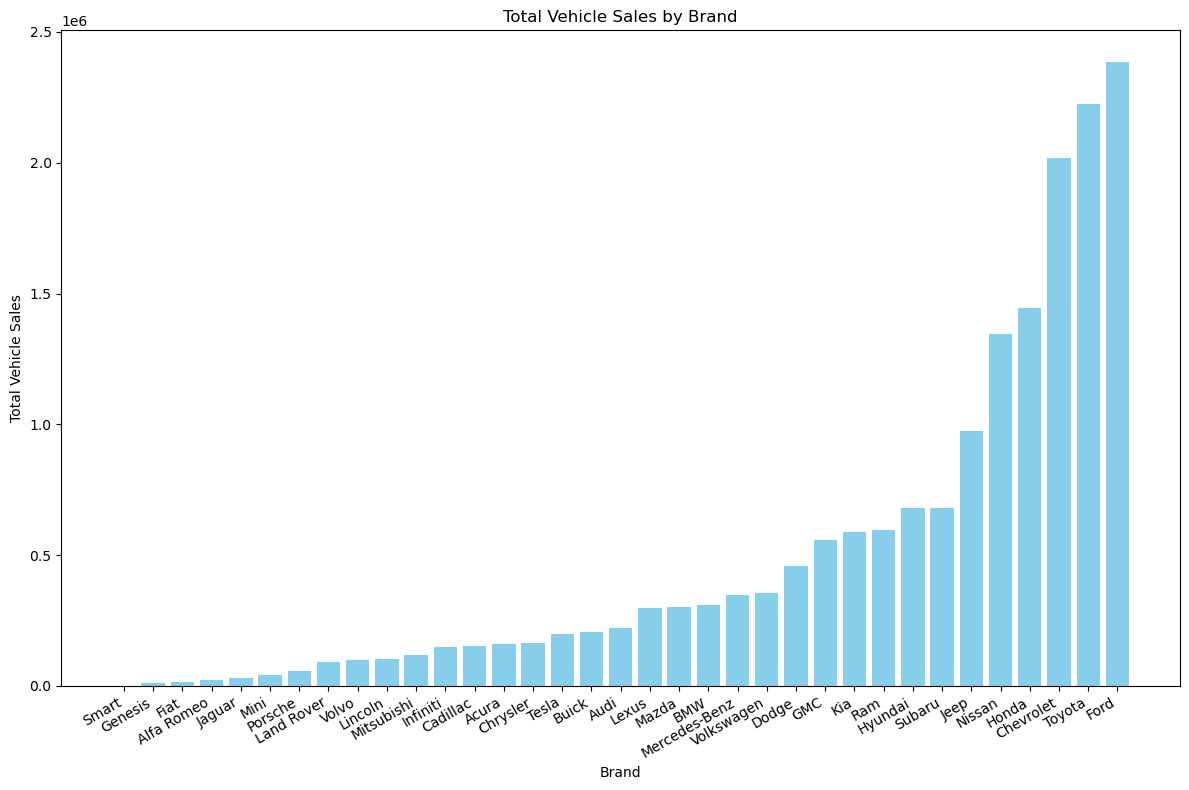

In [37]:
plt.figure(figsize=(12, 8))  
plt.bar(df2['Brand'], df2['Total VehicleSales'], color='skyblue')  
plt.xlabel('Brand') 
plt.ylabel('Total Vehicle Sales')  
plt.title('Total Vehicle Sales by Brand')  
plt.xticks(rotation=30, ha='right')  
plt.tight_layout() 
plt.savefig('/Users/tanvibirla/Desktop/assignment/Total_SalesbyBrand.png')

In [24]:
df1

,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
0,2386588,9216,0.39,2.51,13.70
1,2224156,27595,1.24,7.52,12.77
2,2017205,36325,1.80,9.89,11.58
3,1445627,19550,1.35,5.32,8.30
4,1344597,14715,1.09,4.01,7.72
5,973227,0,0.00,0.00,5.59
6,680135,0,0.00,0.00,3.90
7,679127,2395,0.35,0.65,3.90
8,597368,0,0.00,0.00,3.43
9,589673,5488,0.93,1.49,3.39


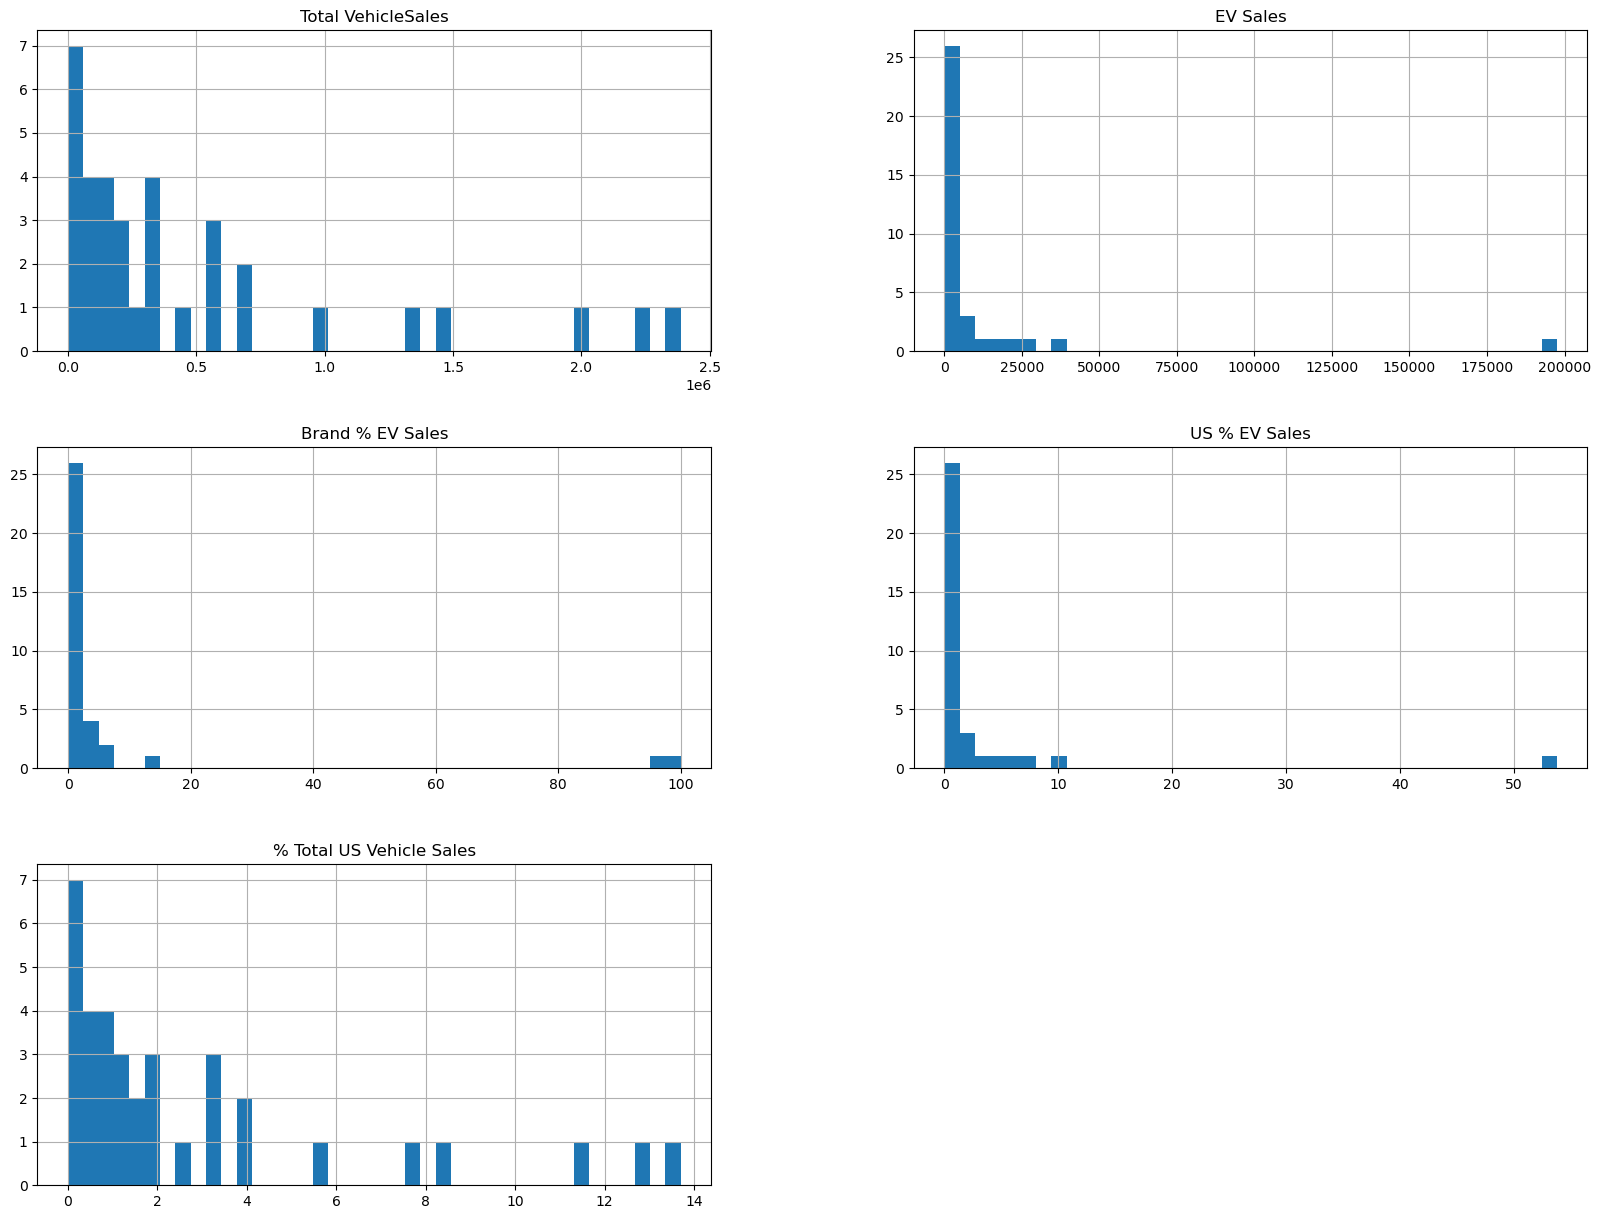

In [25]:
df.hist(bins=40, figsize=(20, 15))
plt.show()

In [26]:
corr_matrix = df1.corr()
corr_matrix

,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
Total VehicleSales,1.000000,0.106199,-0.176326,0.106240,1.000000
EV Sales,0.106199,1.000000,0.676661,1.000000,0.106063
Brand % EV Sales,-0.176326,0.676661,1.000000,0.676636,-0.176334
US % EV Sales,0.106240,1.000000,0.676636,1.000000,0.106104
% Total US Vehicle Sales,1.000000,0.106063,-0.176334,0.106104,1.000000


array([[<Axes: xlabel='Total VehicleSales', ylabel='Total VehicleSales'>,
        <Axes: xlabel='EV Sales', ylabel='Total VehicleSales'>,
        <Axes: xlabel='Brand % EV Sales', ylabel='Total VehicleSales'>,
        <Axes: xlabel='US % EV Sales', ylabel='Total VehicleSales'>,
        <Axes: xlabel='% Total US Vehicle Sales', ylabel='Total VehicleSales'>],
       [<Axes: xlabel='Total VehicleSales', ylabel='EV Sales'>,
        <Axes: xlabel='EV Sales', ylabel='EV Sales'>,
        <Axes: xlabel='Brand % EV Sales', ylabel='EV Sales'>,
        <Axes: xlabel='US % EV Sales', ylabel='EV Sales'>,
        <Axes: xlabel='% Total US Vehicle Sales', ylabel='EV Sales'>],
       [<Axes: xlabel='Total VehicleSales', ylabel='Brand % EV Sales'>,
        <Axes: xlabel='EV Sales', ylabel='Brand % EV Sales'>,
        <Axes: xlabel='Brand % EV Sales', ylabel='Brand % EV Sales'>,
        <Axes: xlabel='US % EV Sales', ylabel='Brand % EV Sales'>,
        <Axes: xlabel='% Total US Vehicle Sales', ylabel='B

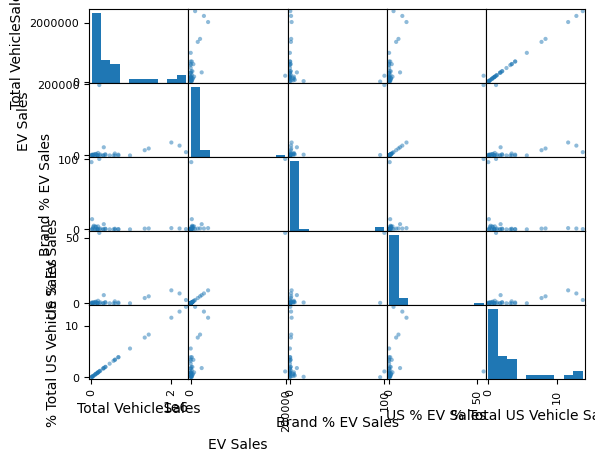

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["Total VehicleSales" , "EV Sales","Brand % EV Sales","US % EV Sales","% Total US Vehicle Sales"]
scatter_matrix(df[attributes])

In [30]:
corr_matrix = df1.corr()
corr_matrix

,Total VehicleSales,EV Sales,Brand % EV Sales,US % EV Sales,% Total US Vehicle Sales
Total VehicleSales,1.000000,0.106199,-0.176326,0.106240,1.000000
EV Sales,0.106199,1.000000,0.676661,1.000000,0.106063
Brand % EV Sales,-0.176326,0.676661,1.000000,0.676636,-0.176334
US % EV Sales,0.106240,1.000000,0.676636,1.000000,0.106104
% Total US Vehicle Sales,1.000000,0.106063,-0.176334,0.106104,1.000000
